## Imports

In [1]:
#Data loading
import os
from scipy.io import arff
#General
import pandas as pd
import numpy as np
from numpy import std, mean, sqrt
import tensorflow as tf
import math
#Statistics
from scipy.stats import normaltest
from scipy.stats import chisquare
from scipy.stats import ttest_ind
#Visualization
from matplotlib import pyplot as plt
import matplotlib
#Utility
from tabulate import tabulate

/home/paf/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/paf/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/paf/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/paf/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:4

In [2]:
#Custom imports
from stat_util import normal_test_all_model_samples
from stat_util import t_test_model_samples_against_other_model_samples
from stat_util import cohen_d_test_model_samples_against_other_model_samples

## Dataset preparation

In [3]:
models = ["DecisionTreeClassifier","GaussianNB","KNeighborsClassifier","LogisticRegression","REPD","HSME"]
datasets = ["jm1","kc1","kc2"]#"cm1",,"pc1"
percentages = [0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
main_model_name = "REPD"

In [4]:
colnames = ['Unnamed: 0','Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', "PD", "PF", "Percentage"]

In [5]:
main_df = None

for dataset in datasets:
    for percentage in percentages:
        file_name = "results/"+dataset+"_"+str(percentage) 
        if os.path.exists(file_name):
            results_df = pd.read_csv(file_name,names=colnames, header=None)
            results_df = results_df.drop(columns=["Unnamed: 0"])
            results_df = results_df.assign(Dataset=lambda x: dataset)
            if main_df is None:
                main_df = results_df
            else: 
                main_df = pd.concat([main_df,results_df])

In [6]:
results = {}
result_percentages = {}
for dataset in datasets:
    results[dataset] = {}
    result_percentages[dataset] = {}
    for model in models:
        results[dataset][model] = []
        result_percentages[dataset][model] = []
        for percentage in percentages:
            mean_res_df = main_df[(main_df["Dataset"]==dataset) & (main_df["Model"]==model) & (main_df["Percentage"]==percentage)]["F1 score"].mean()
            if not math.isnan(mean_res_df):
                results[dataset][model].append(mean_res_df)
                result_percentages[dataset][model].append(percentage)

jm1


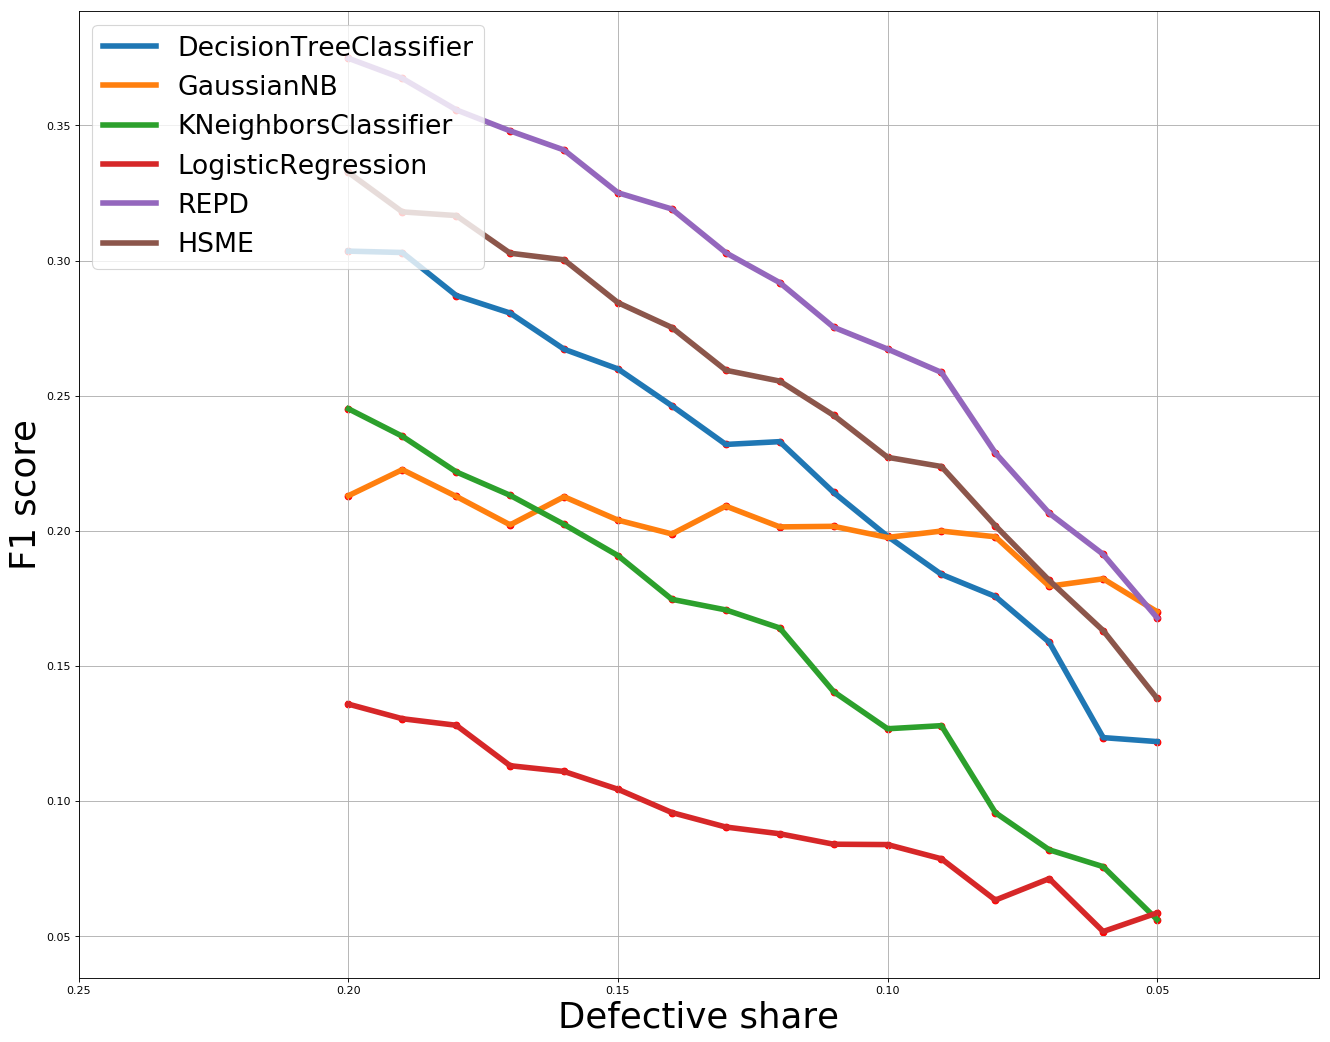

kc1


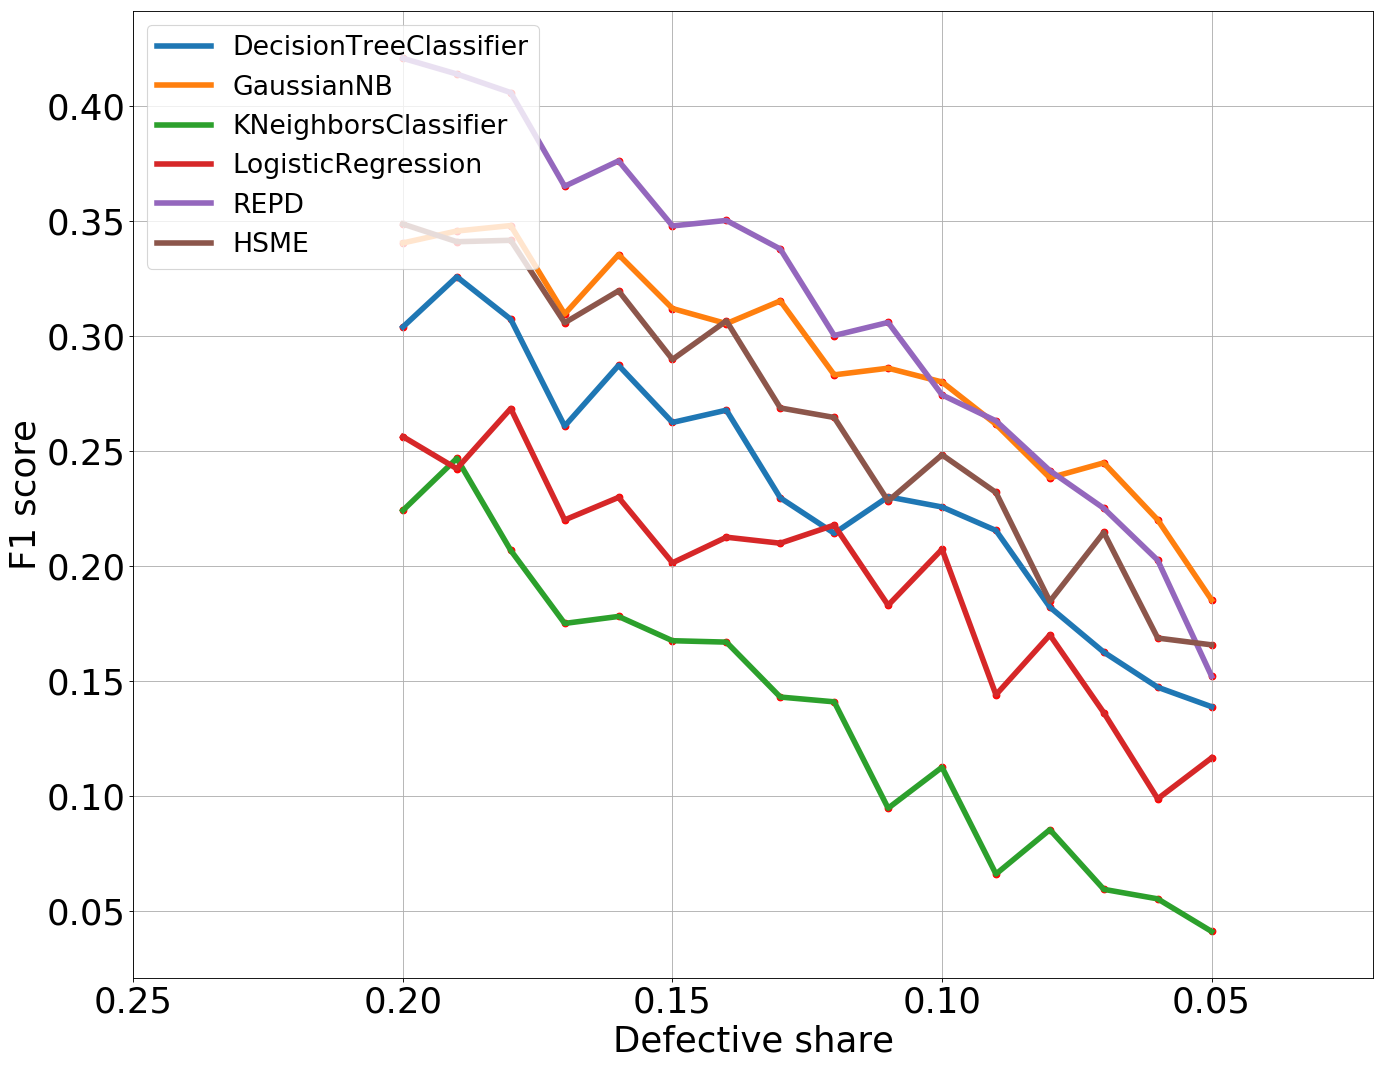

kc2


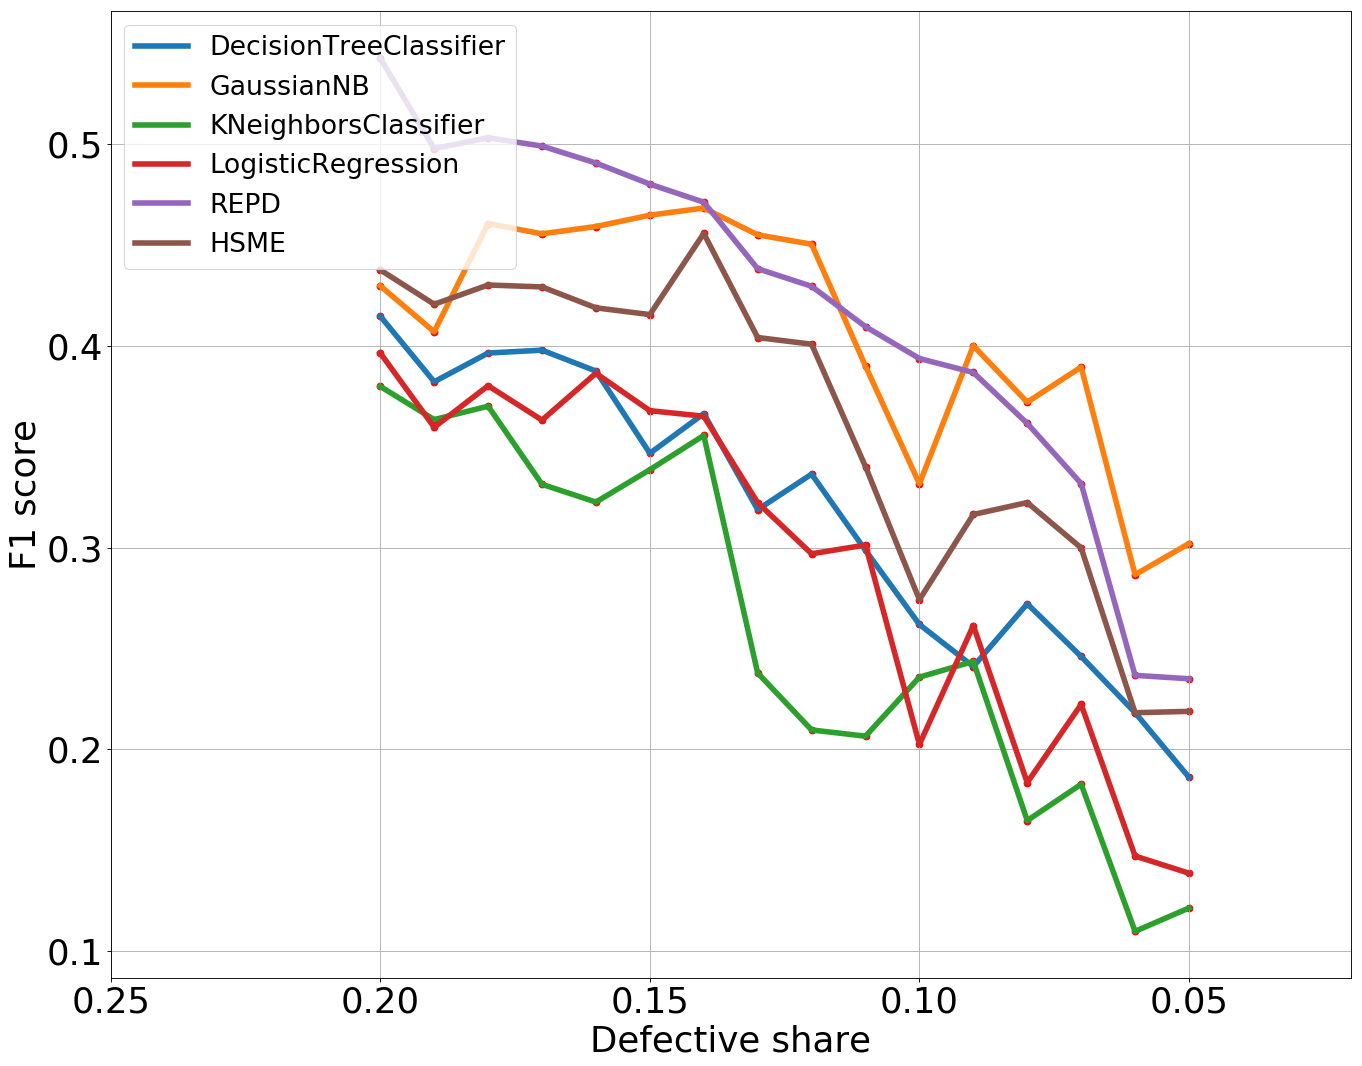

In [7]:
from matplotlib.pyplot import figure

for dataset in datasets:
    figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

    for model in models:
        plt.plot(result_percentages[dataset][model],results[dataset][model],label=model, linewidth=5)
        plt.scatter(result_percentages[dataset][model],results[dataset][model],color="red")
    #
    font = {'size'   : 32}

    matplotlib.rc('font', **font) 
    #
    plt.xlim(0.25, 0.02,0.01)
    plt.legend(loc='upper left',prop={'size': 24})
    plt.grid()
    plt.xlabel("Defective share",fontdict={'size':32})
    plt.ylabel("F1 score",fontdict={'size':32})
    plt.savefig("under_sample_"+dataset+".pdf",format="pdf")
    print(dataset)
    plt.show()

## Oversample

In [8]:
models = ["DecisionTreeClassifier","GaussianNB","KNeighborsClassifier","LogisticRegression","REPD","HSME"]
datasets = ["jm1","kc1","kc2"]#"cm1","pc1"
percentages = [0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20]
main_model_name = "REPD"

In [9]:
main_df = None

for dataset in datasets:
    for percentage in percentages:
        file_name = "results/"+dataset+"_add_"+str(percentage)
        if os.path.exists(file_name):
            results_df = pd.read_csv(file_name,names=colnames, header=None)
            results_df = results_df.drop(columns=["Unnamed: 0"])
            results_df = results_df.assign(Dataset=lambda x: dataset)
            if main_df is None:
                main_df = results_df
            else: 
                main_df = pd.concat([main_df,results_df])

In [10]:
results = {}
result_percentages = {}
for dataset in datasets:
    results[dataset] = {}
    result_percentages[dataset] = {}
    for model in models:
        results[dataset][model] = []
        result_percentages[dataset][model] = []
        for percentage in percentages:
            mean_res_df = main_df[(main_df["Dataset"]==dataset) & (main_df["Model"]==model) & (main_df["Percentage"]==percentage)]["F1 score"].mean()
            if not math.isnan(mean_res_df):
                results[dataset][model].append(mean_res_df)
                result_percentages[dataset][model].append(percentage)

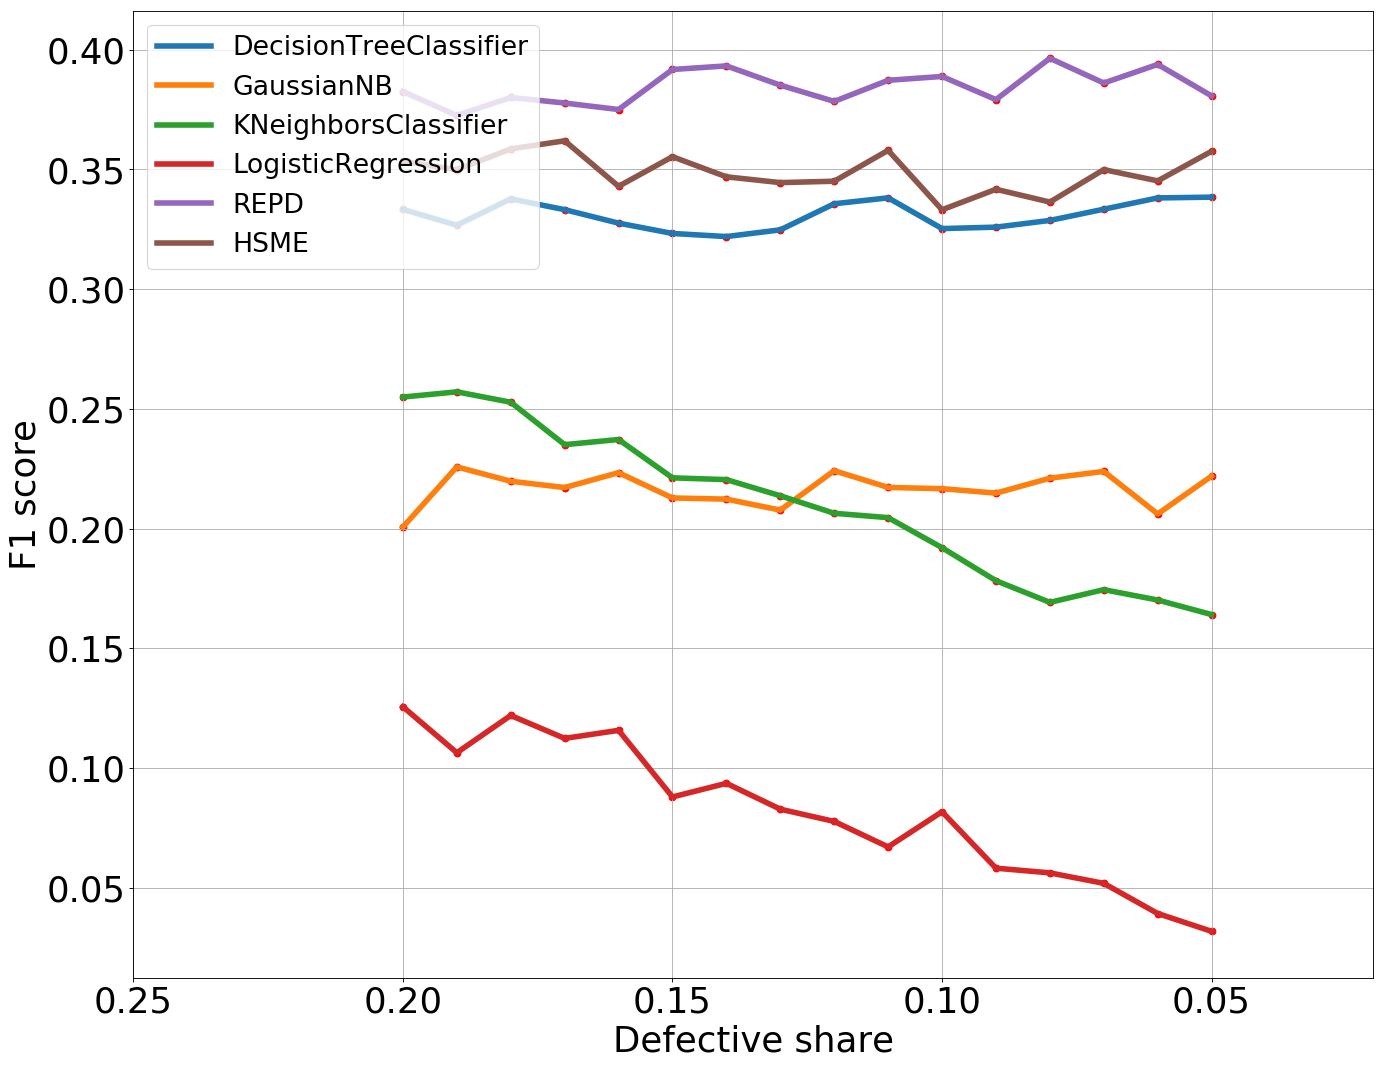

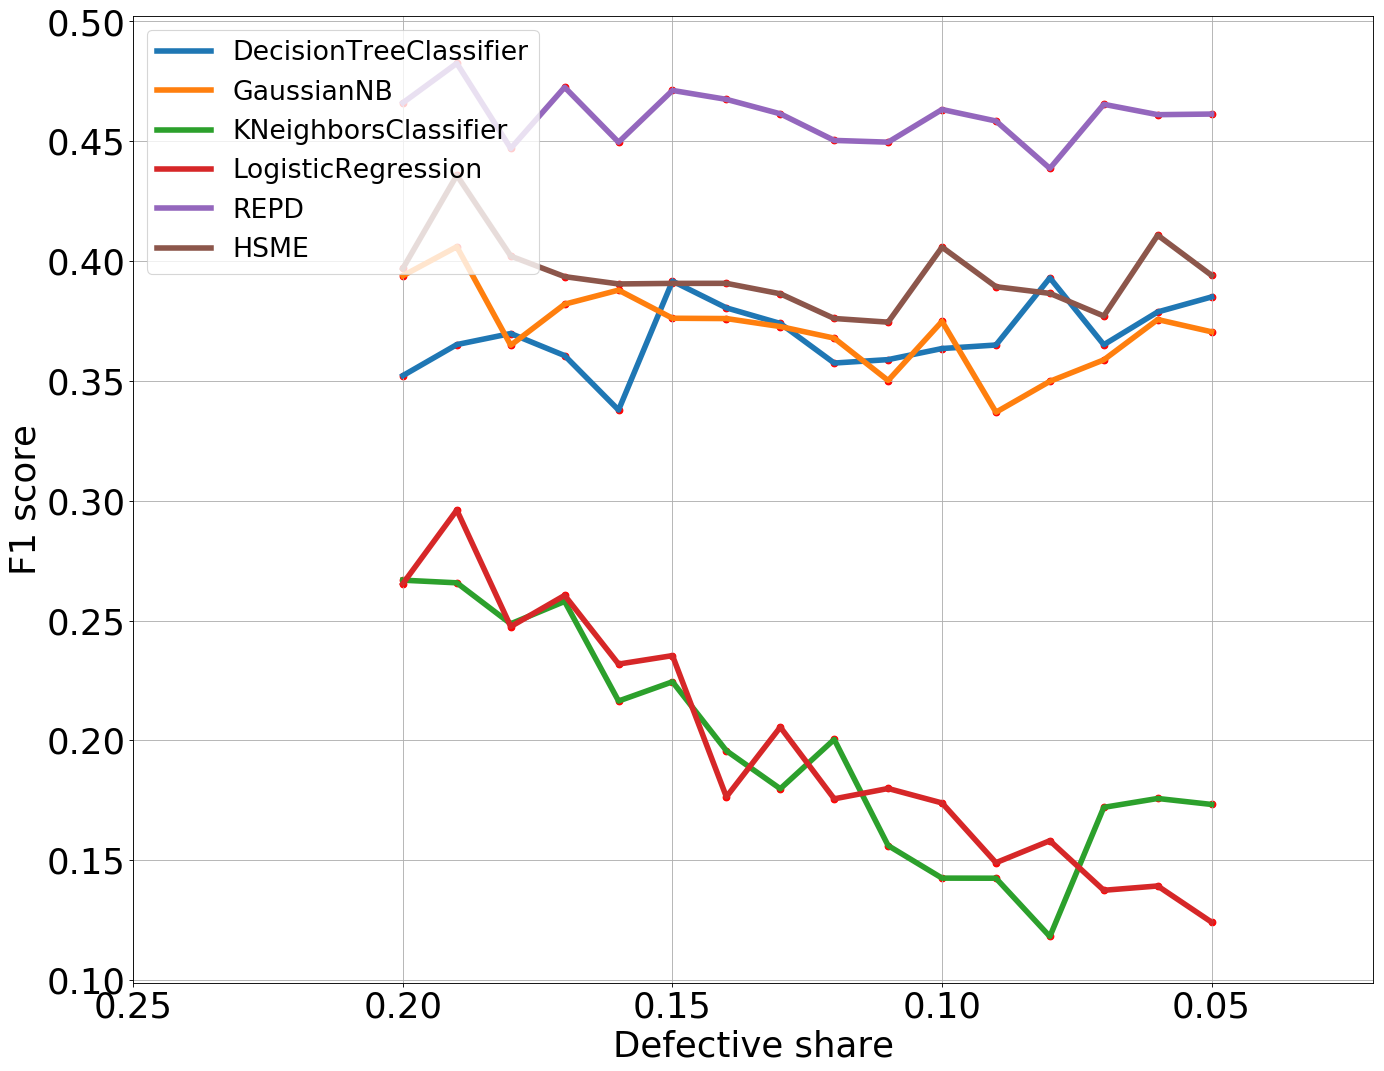

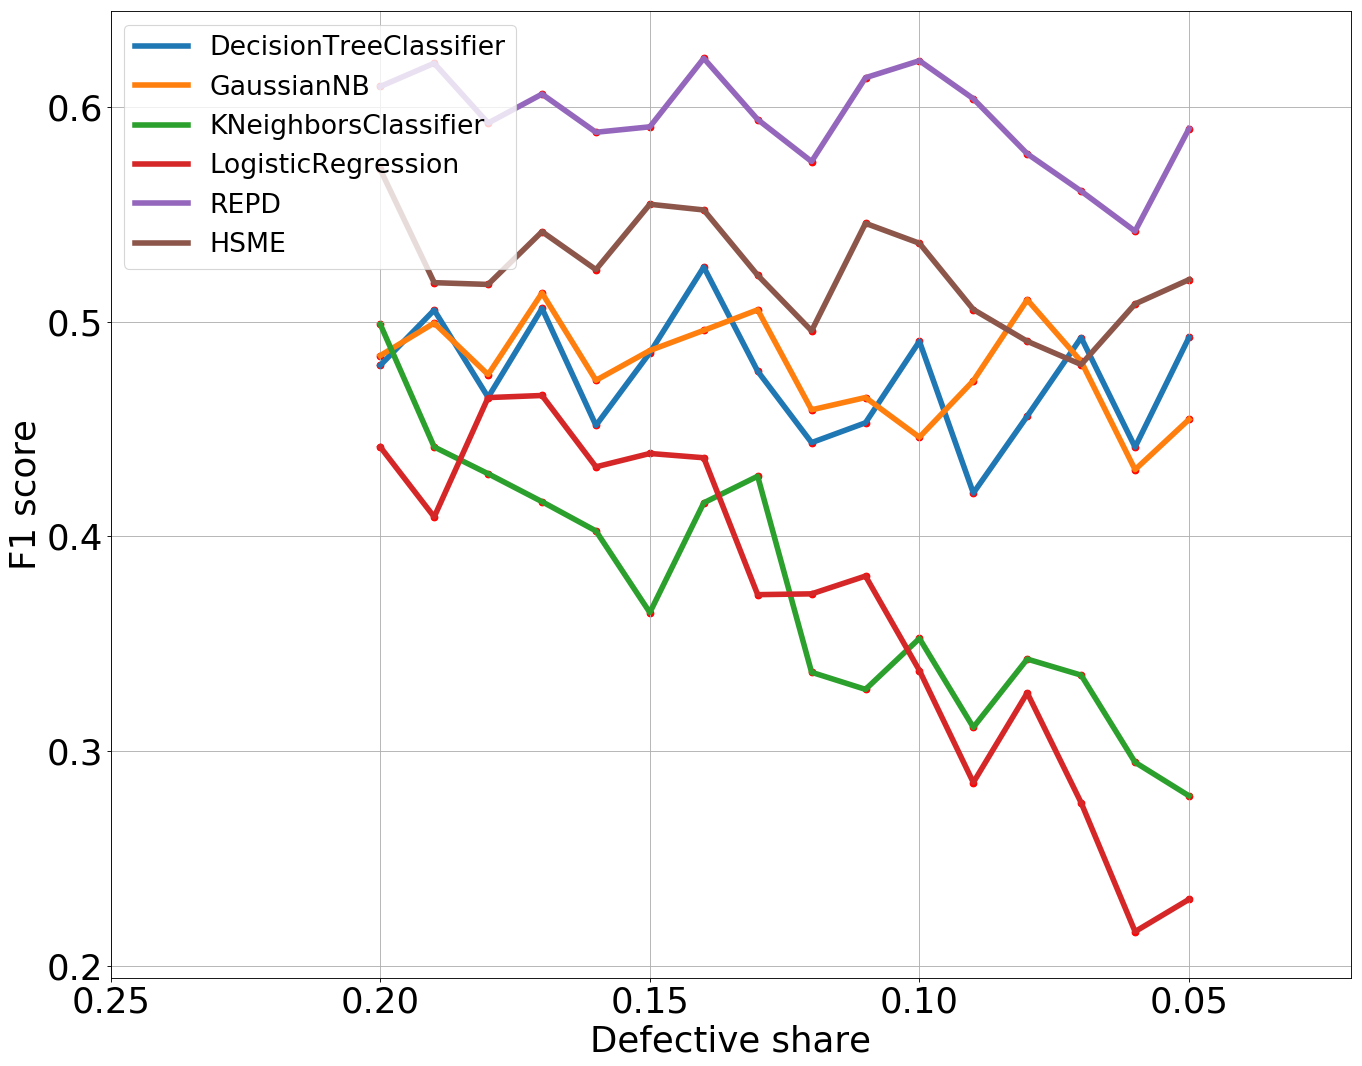

In [11]:
from matplotlib.pyplot import figure

for dataset in datasets:
    figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

    for model in models:
        plt.plot(result_percentages[dataset][model],results[dataset][model],label=model, linewidth=5)
        plt.scatter(result_percentages[dataset][model],results[dataset][model],color="red")
    #
    font = {'size': 32}

    matplotlib.rc('font', **font) 
    #
    plt.xlim(0.25, 0.02,0.01)
    plt.legend(loc='upper left',prop={'size': 24})
    plt.grid()
    plt.xlabel("Defective share",fontdict={'size':32})
    plt.ylabel("F1 score",fontdict={'size':32})
    plt.savefig("over_sample_"+dataset+".pdf",format="pdf")
    plt.show()